In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./HR_comma_sep.csv')

![https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction/discussion/454737]

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#standardizing column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

In [8]:
df.shape

(14999, 10)

In [9]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df0=df.drop_duplicates(keep='first')

In [11]:
df0.shape

(11991, 10)

In [35]:
print("Department uniques: ",df0['department'].unique())
print("Salary uniques: ",df0['salary'].unique())

Department uniques:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary uniques:  ['low' 'medium' 'high']


In [36]:
print("Promotion last 5 years uniques: ",df0['promotion_last_5years'].unique())

Promotion last 5 years uniques:  [0 1]


In [15]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


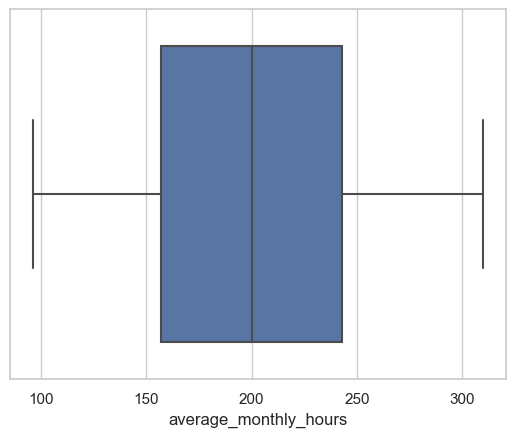

In [16]:
sns.set(style="whitegrid")
# Create a boxplot
sns.boxplot(x='average_monthly_hours', data=df0)

# Show the plot
plt.show()

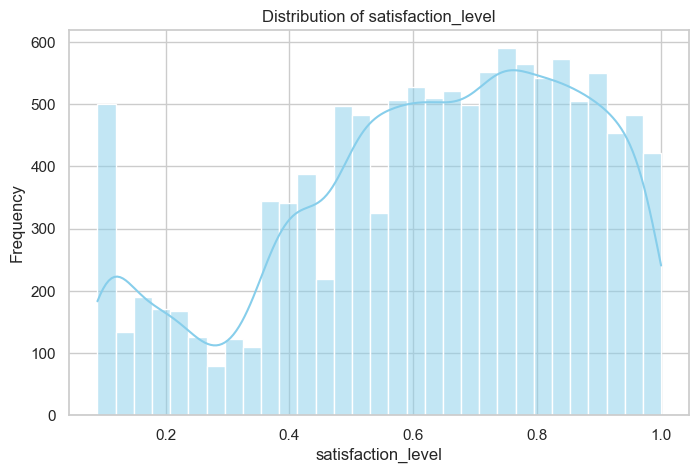

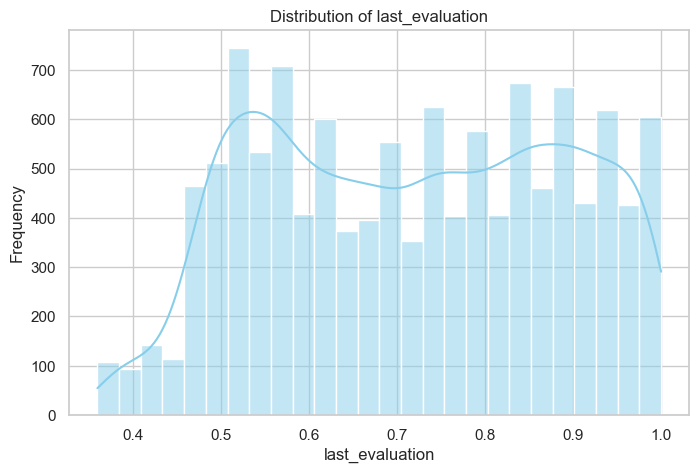

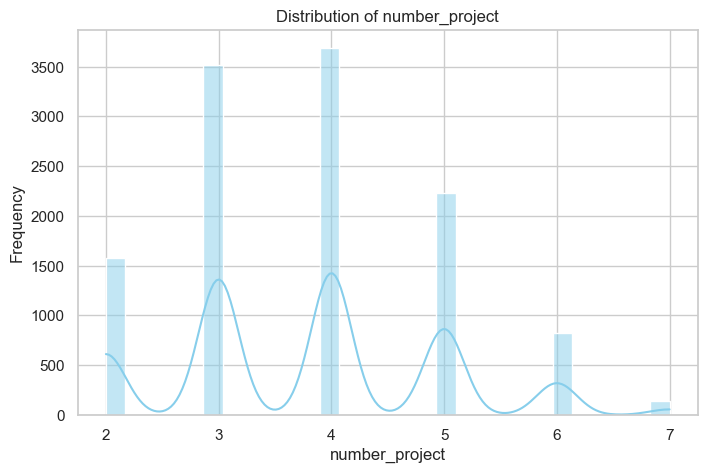

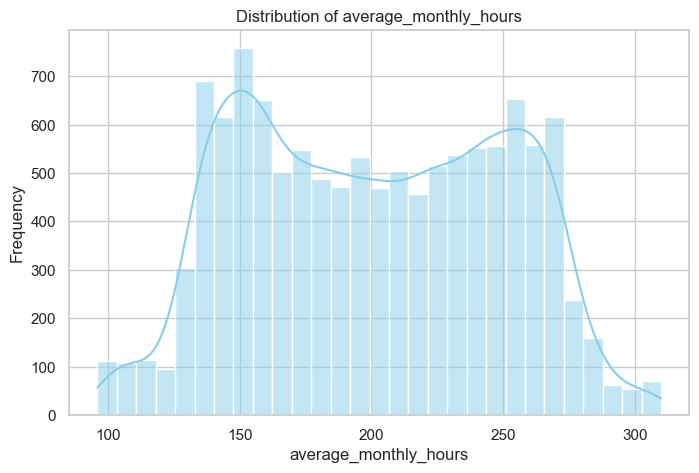

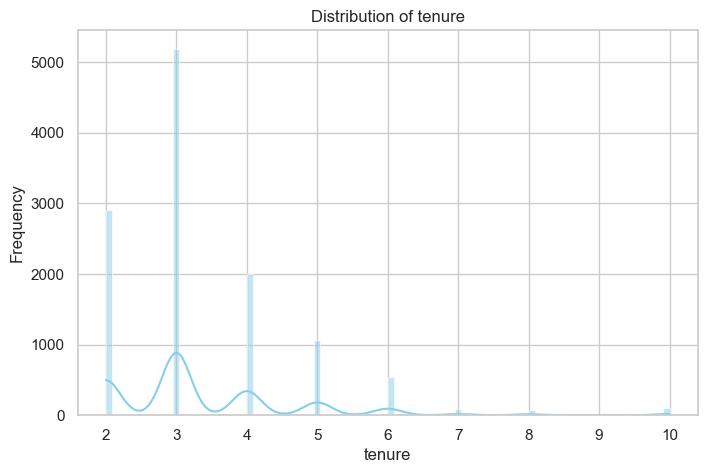

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Numerical Variables
numerical_vars = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']

# Create histograms for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(df0[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

### Checking for outliers

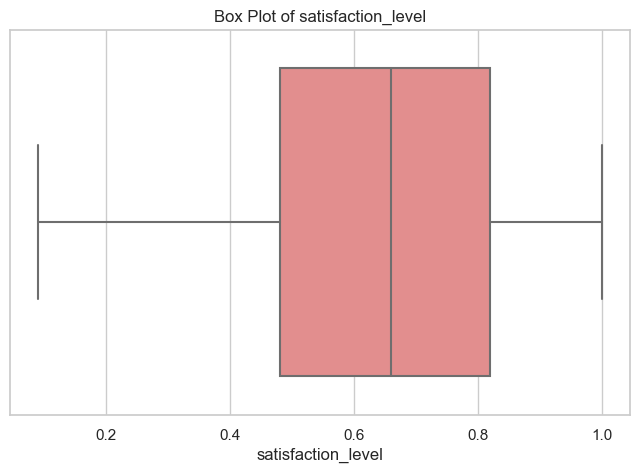

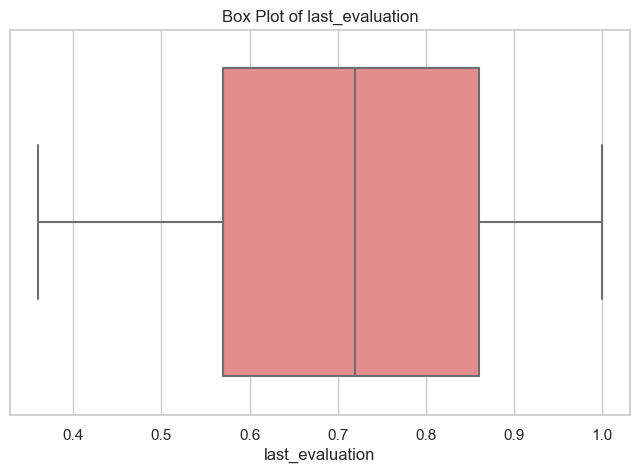

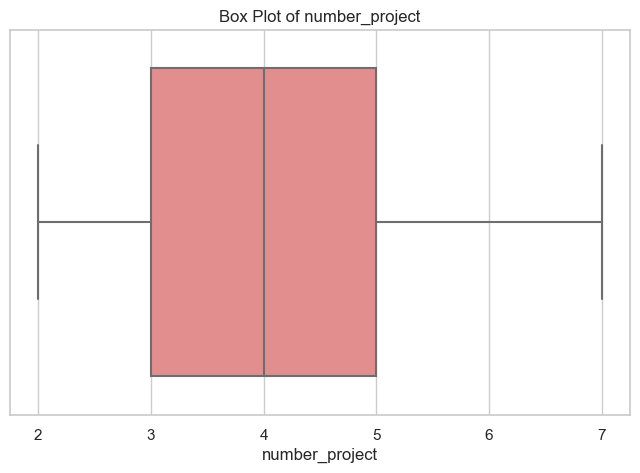

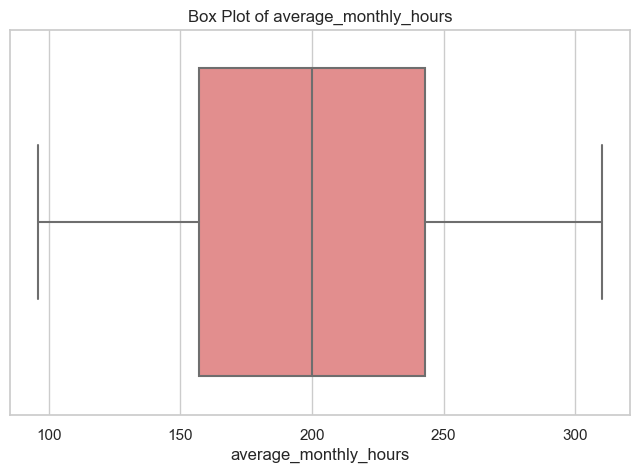

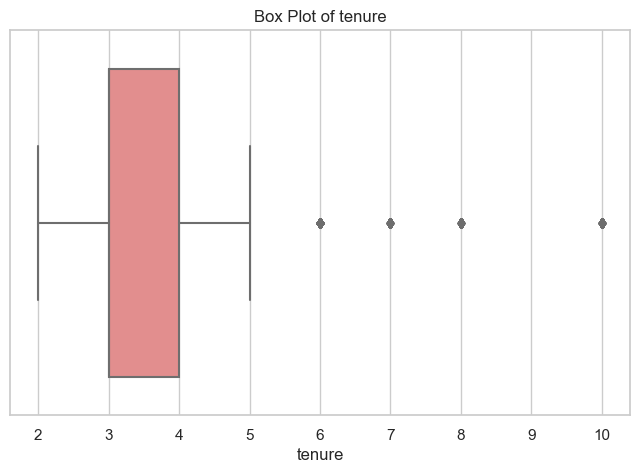

In [18]:
# using box plots
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df0[var], color='lightcoral')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

#### It seems tenure has outliers

In [21]:

# Compute the 25th percentile value in `tenure`
percentile25 = df0['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df0['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df0[(df0['tenure'] > upper_limit) | (df0['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


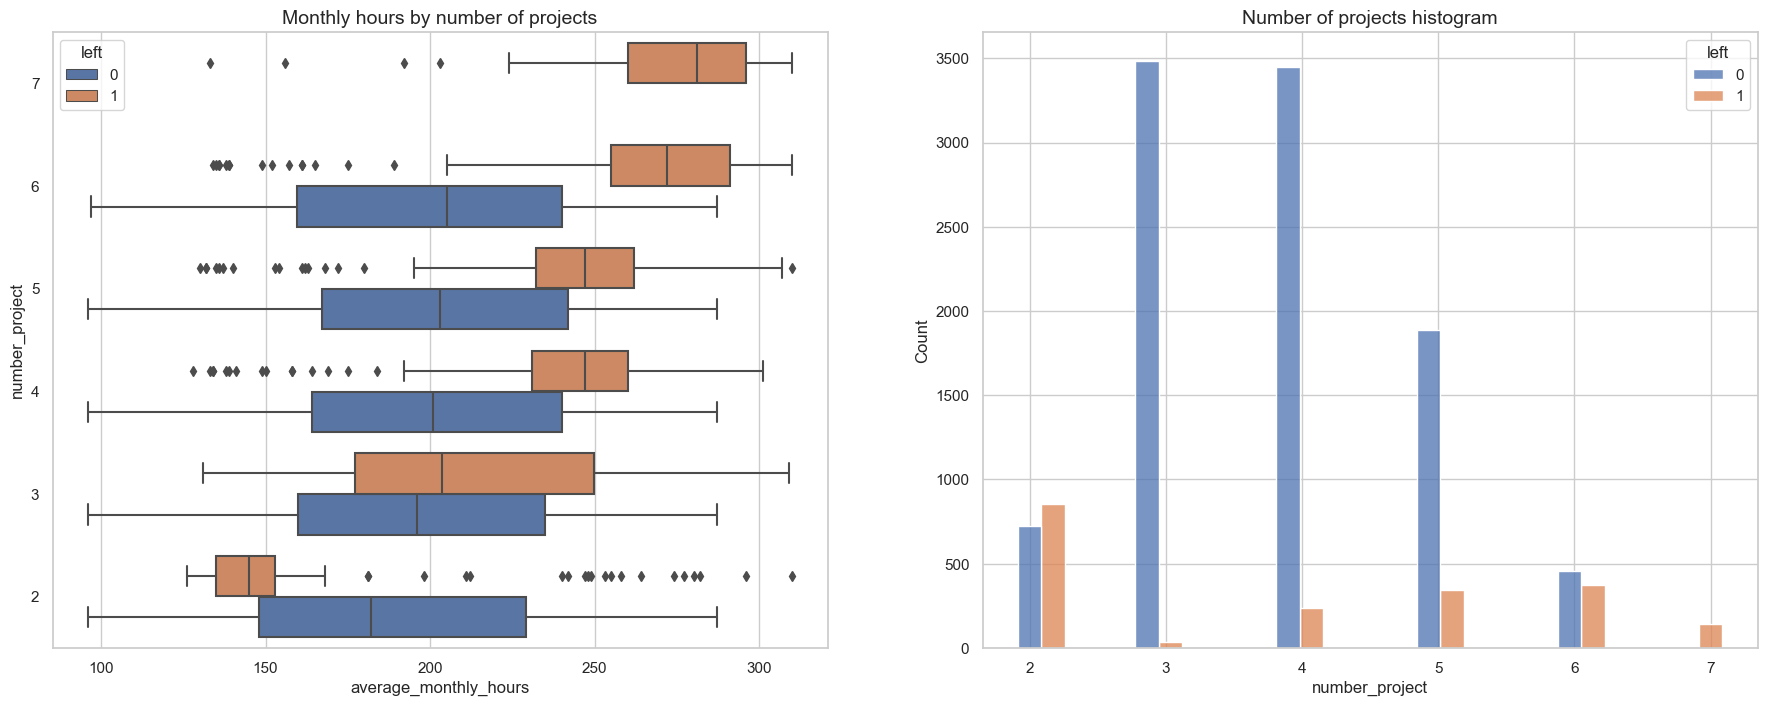

In [24]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df0, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df0[df0['left']==0]['number_project']
tenure_left = df0[df0['left']==1]['number_project']
sns.histplot(data=df0, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

### Categorical Variables

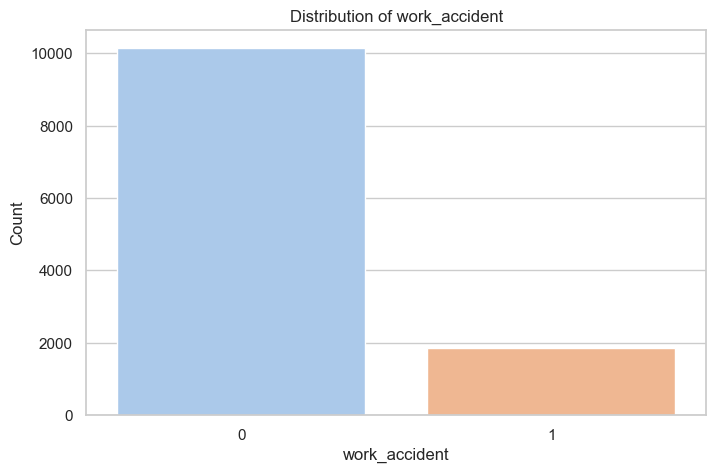

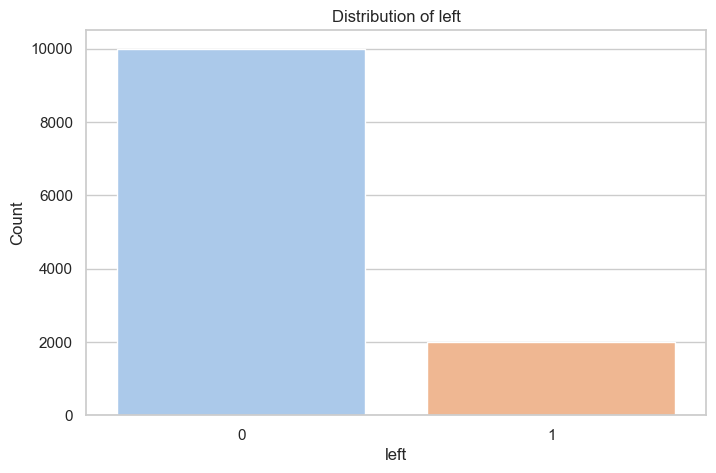

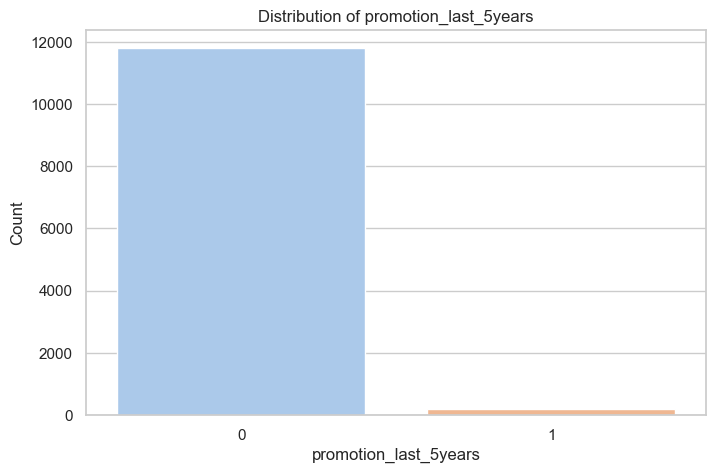

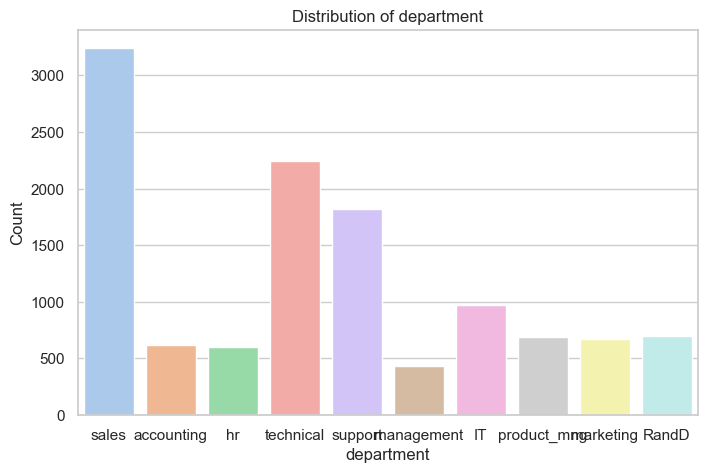

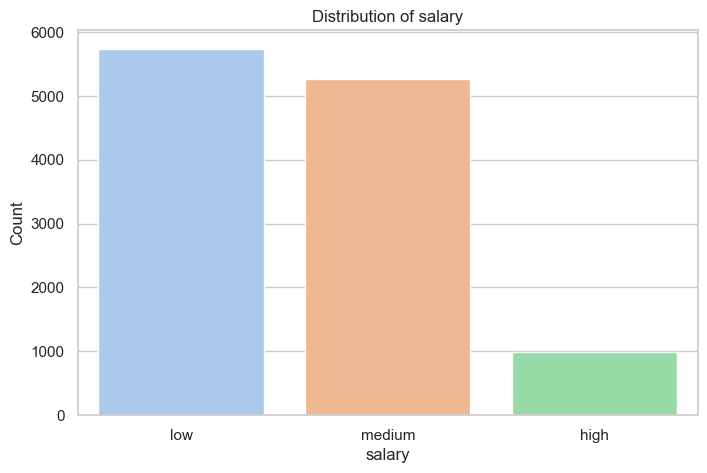

In [25]:
categorical_vars = ['work_accident', 'left', 'promotion_last_5years', 'department', 'salary']

# Create bar plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df0[var], palette='pastel')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    
    # Rotate x-axis labels if the variable is 'Department'
    if var == 'Department':
        plt.xticks(rotation=90)
    
    plt.show()

###  Bivariate Analysis:

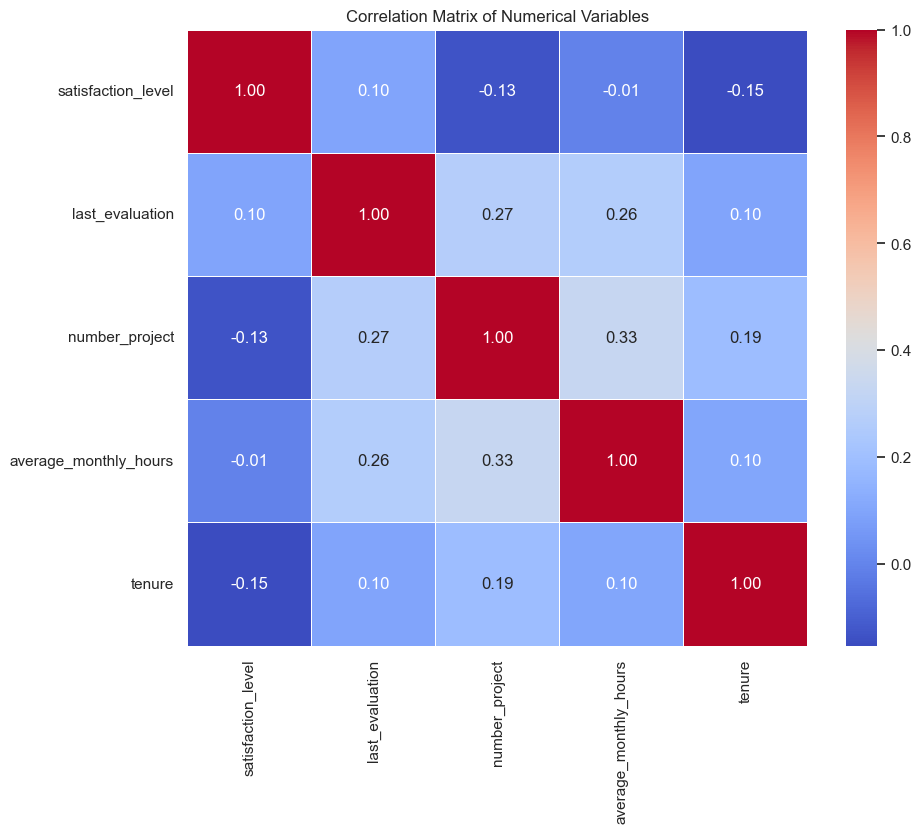

In [26]:
# Check correlations between numerical variables
correlation_matrix = df0[numerical_vars].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

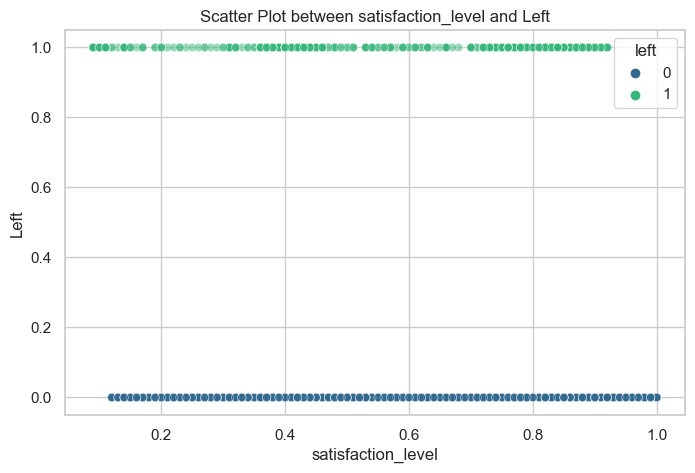

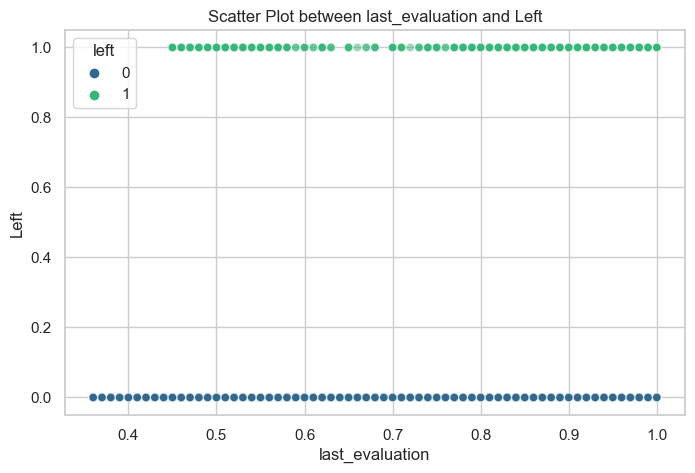

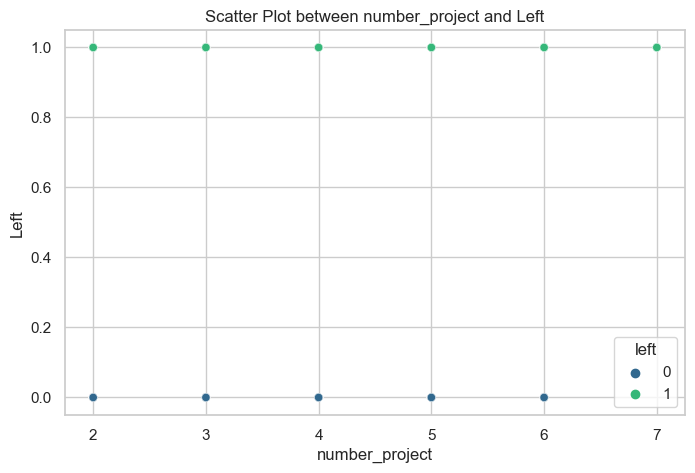

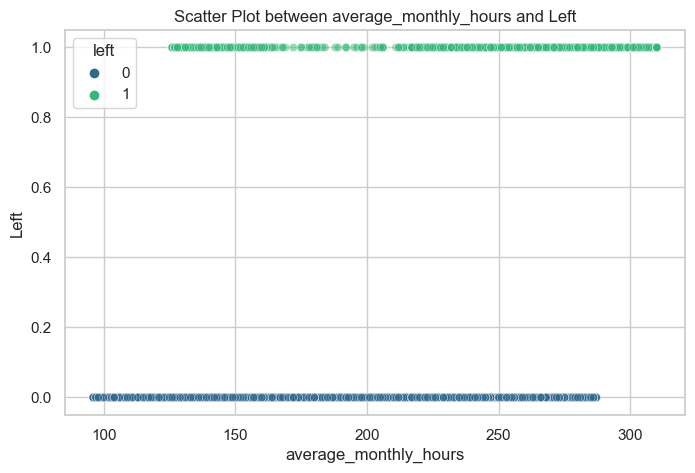

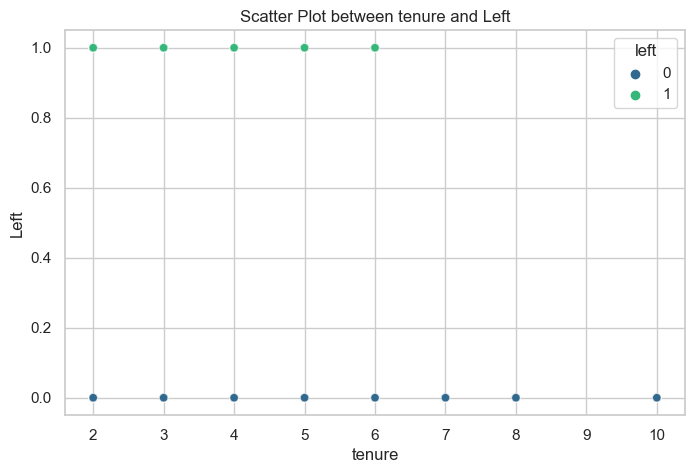

In [27]:
# Create scatter plots for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=var, y='left', data=df0, hue='left', palette='viridis', alpha=0.5)
    plt.title(f'Scatter Plot between {var} and Left')
    plt.xlabel(var)
    plt.ylabel('Left')
    plt.show()

C:\Users\abhij\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


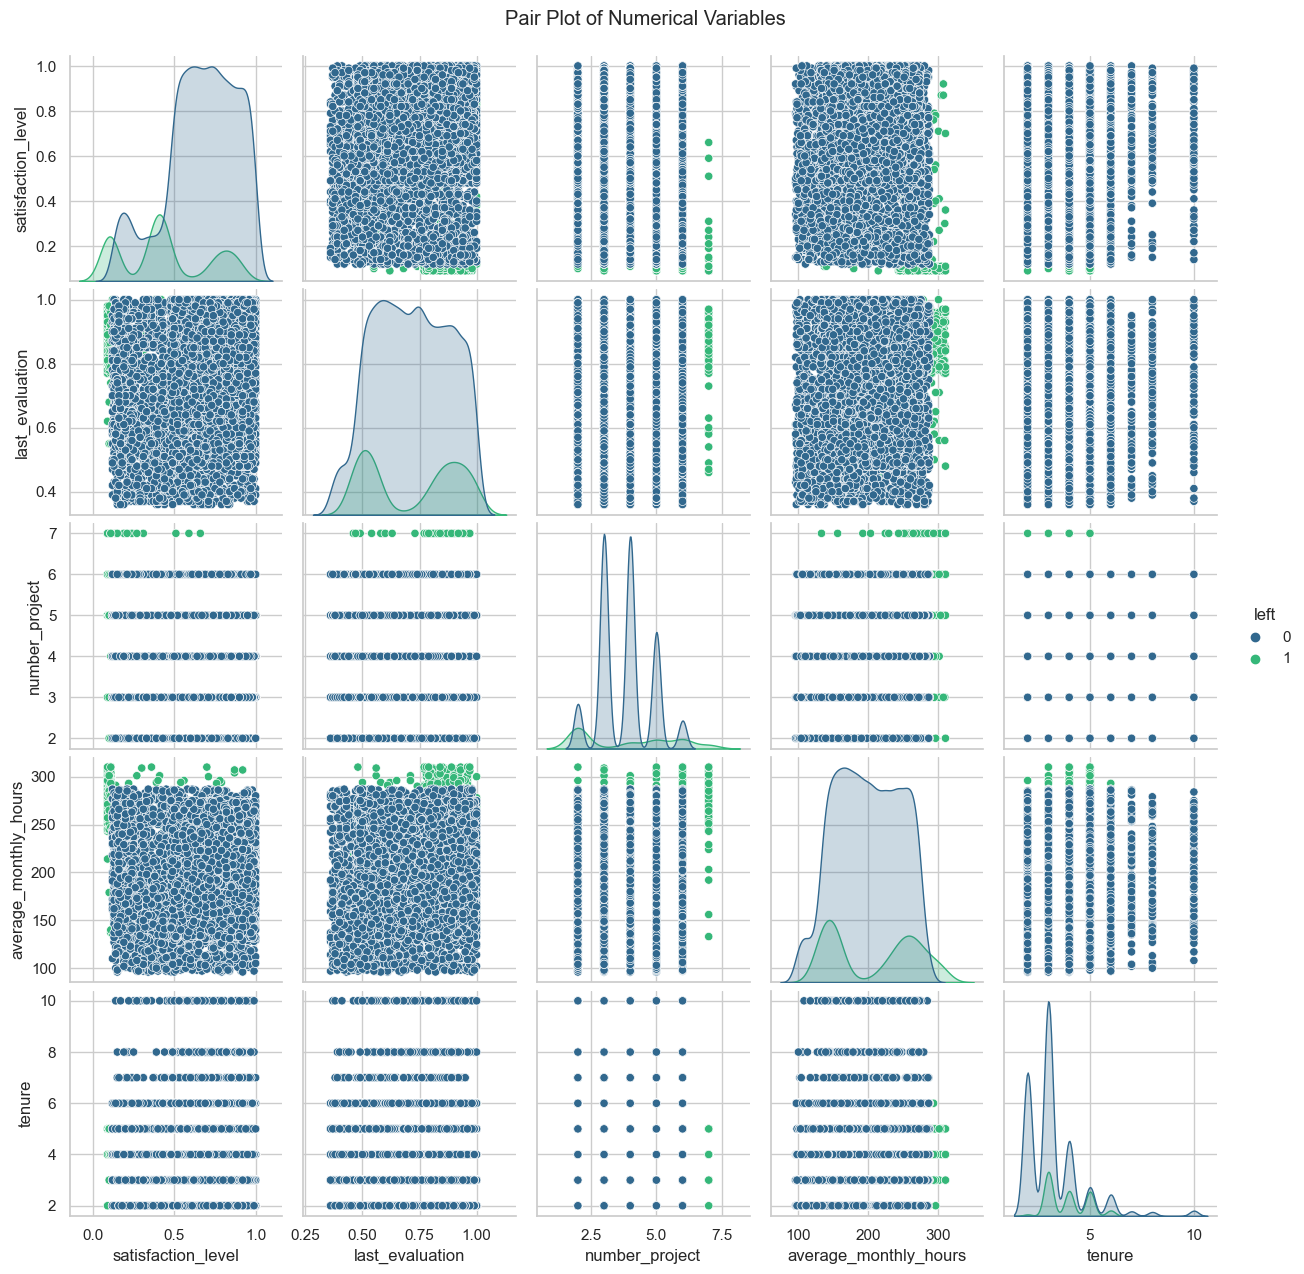

In [28]:
# Pair plot for numerical variables
sns.pairplot(df0[numerical_vars + ['left']], hue='left', palette='viridis')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

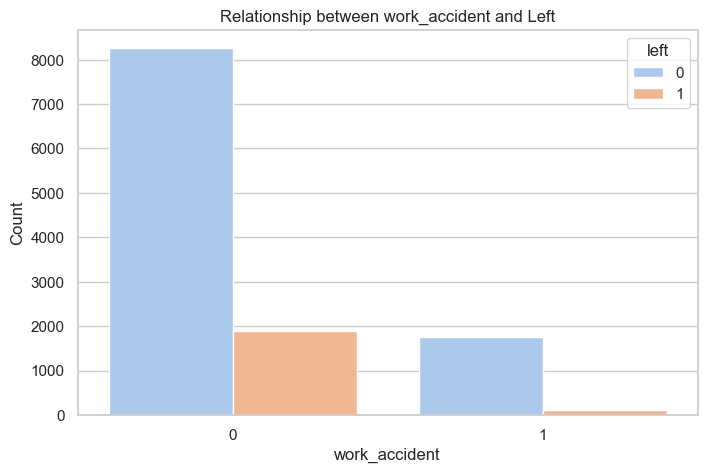

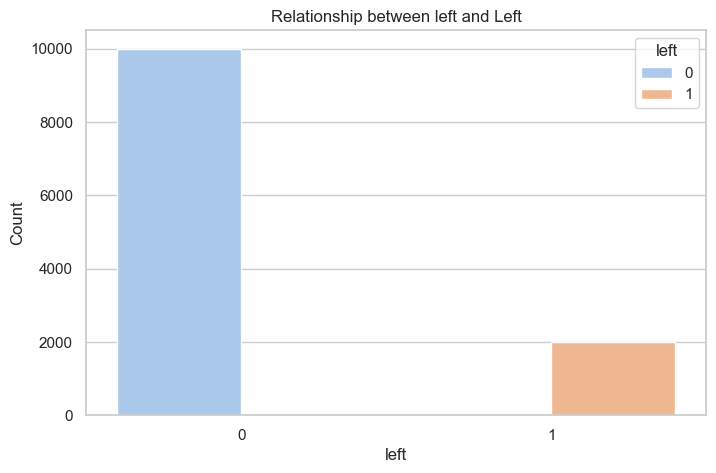

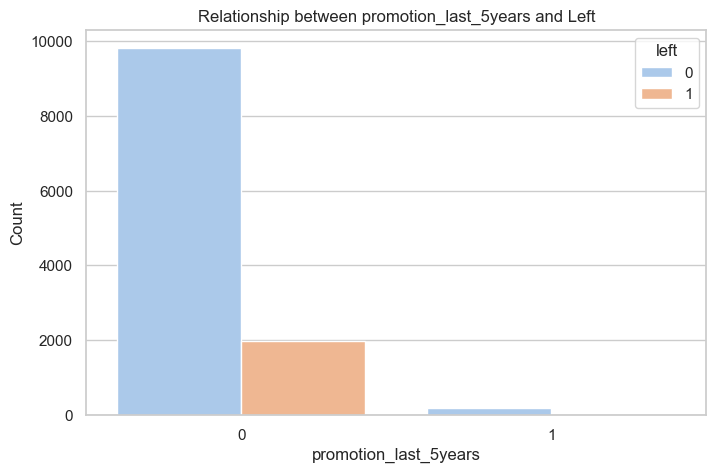

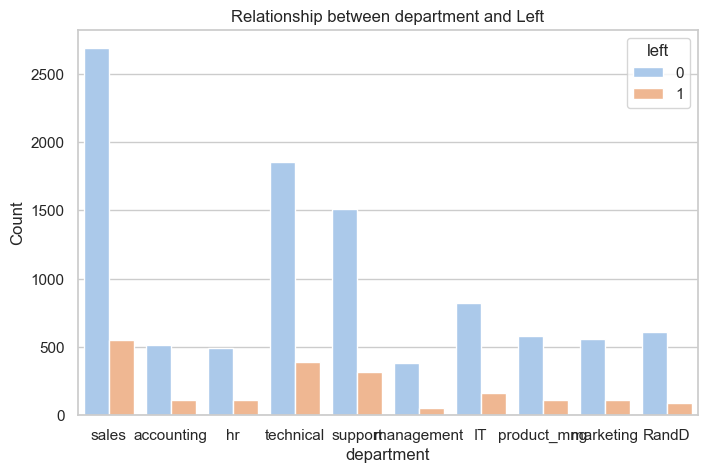

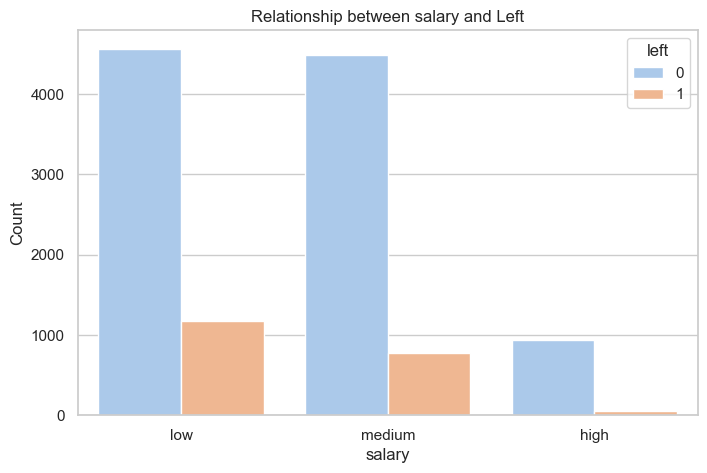

In [29]:
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, hue='left', data=df0, palette='pastel')
    plt.title(f'Relationship between {var} and Left')
    plt.xlabel(var)
    plt.ylabel('Count')
    # Rotate x-axis labels if the variable is 'Department'
    if var == 'Department':
        plt.xticks(rotation=90)
    plt.show()


### Target Variable

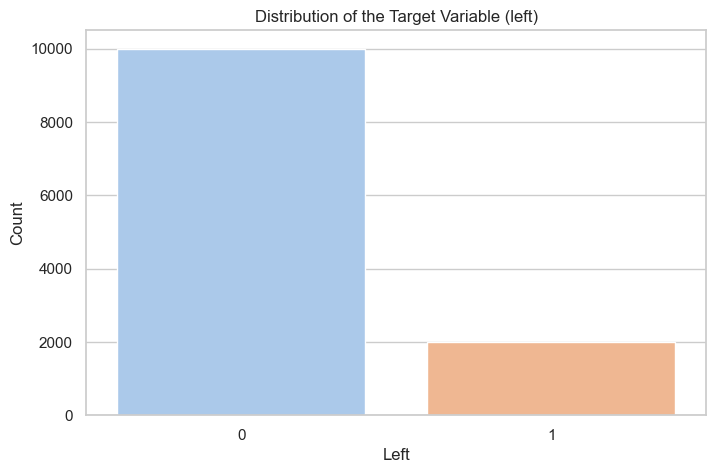

Class Distribution:
left
0    11428
1     3571
Name: count, dtype: int64

Class Percentages:
left
0    76.191746
1    23.808254
Name: count, dtype: float64


In [30]:

# Explore the distribution of the target variable 'left'
plt.figure(figsize=(8, 5))
sns.countplot(x='left', data=df0, palette='pastel')
plt.title('Distribution of the Target Variable (left)')
plt.xlabel('Left')
plt.ylabel('Count')
plt.show()

# Check the balance of classes
left_counts = df['left'].value_counts()
print("Class Distribution:")
print(left_counts)

# Calculate the percentage of each class
class_percentages = left_counts / left_counts.sum() * 100
print("\nClass Percentages:")
print(class_percentages)


In [31]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

NameError: name 'df1' is not defined

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations to make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.



In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
import numpy as np
df0.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

#### Salary lvel for different tenure

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

 #### Relation between `average_monthly_hours` versus `last_evaluation`


In [ ]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

#### whether employees who worked very long hours were promoted in the last five years.

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours

#### How the employees who left are distributed across departments

In [ ]:
# Display counts for each department
df1["department"].value_counts()

In [ ]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df0, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

### Multivariate analysis

In [ ]:
selected_numerical_vars = ['satisfaction_level', 'average_monthly_hours', 'tenure']

# Create a heatmap for the interaction between selected numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df0[selected_numerical_vars].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Selected Numerical Variables')
plt.show()

### Feature Engineering

In [ ]:
# Example: Creating a new feature 'hours_per_project' by dividing 'average_montly_hours' by 'number_project'
df1=df0
df1['hours_per_project'] = df1['average_monthly_hours'] / df0['number_project']
df1[['average_monthly_hours','number_project','hours_per_project']]
